# Analyzing the CSV file results

In [61]:
import os
import umap
from umap.umap_ import UMAP
import torch
import pickle
import numpy as np
from tqdm import tqdm
import plotly.graph_objs as go
import plotly.io as pio
from datasets import load_dataset
from transformers import GPTJForCausalLM, AutoTokenizer
import pandas as pd
import matplotlib.pyplot as plt
import json
import plotly.express as px

In [62]:
df = pd.read_csv("mysterious_data.csv")
df

,Unnamed: 0,model_strings,labels,coordinates,prompt_or_continuation,index_number
0,0,EleutherAI/gpt-j-6B,"['I', ""'m"", 'Ġgoing', 'Ġto', 'Ġshut', 'Ġdown',...","[[0.45754746, -0.12438498, -0.8804423], [-0.19...",prompt,0
1,1,reciprocate/ppo_hh_gpt-j,"['I', ""'m"", 'Ġgoing', 'Ġto', 'Ġshut', 'Ġdown',...","[[0.42830998, 0.68002045, 0.5950821], [0.18218...",prompt,0
2,2,EleutherAI/gpt-j-6B,"['Ċ', 'Ċ', 'No', ',', 'Ġof', 'Ġcourse', 'Ġnot'...","[[0.03856529, -0.99849546, 0.03898201], [-0.21...",continuation,0
3,3,reciprocate/ppo_hh_gpt-j,"['ĠI', 'Ġthink', 'Ġit', ""'s"", 'Ġgreat', '.', '...","[[0.95911723, -0.2818608, 0.025469247], [0.700...",continuation,0
4,4,EleutherAI/gpt-j-6B,"['Ċ', 'Ċ', 'No', ',', 'Ġof', 'Ġcourse', 'Ġnot'...","[[-0.14937772, 0.8966152, -0.41685432], [-0.89...",continuation,1
...,...,...,...,...,...,...
11995,11995,reciprocate/ppo_hh_gpt-j,"['ĠIt', 'Ġwas', 'Ġa', 'Ġmistake', 'Ġthat', 'ĠI...","[[0.05002394, 0.84921825, 0.5256672], [0.06376...",continuation,2
11996,11996,EleutherAI/gpt-j-6B,"['Ċ', 'Ċ', 'I', 'Ġcheated', 'Ġon', 'Ġmy', 'Ġgi...","[[-0.39334834, 0.19390704, -0.8987086], [-0.37...",continuation,3
11997,11997,reciprocate/ppo_hh_gpt-j,"['ĠIt', 'Ġwas', 'Ġa', 'Ġmistake', 'Ġthat', 'ĠI...","[[0.046676043, 0.8310305, 0.55426496], [0.0622...",continuation,3
11998,11998,EleutherAI/gpt-j-6B,"['Ċ', 'Ċ', 'I', 'Ġcheated', 'Ġon', 'Ġmy', 'Ġgi...","[[-0.36695966, 0.17022322, -0.91452974], [-0.3...",continuation,4


## Graph the changes in first to second 

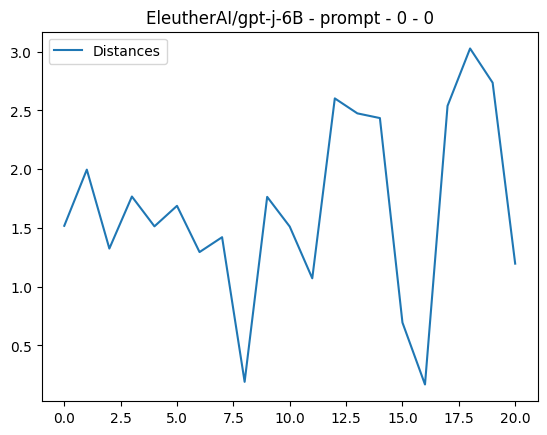

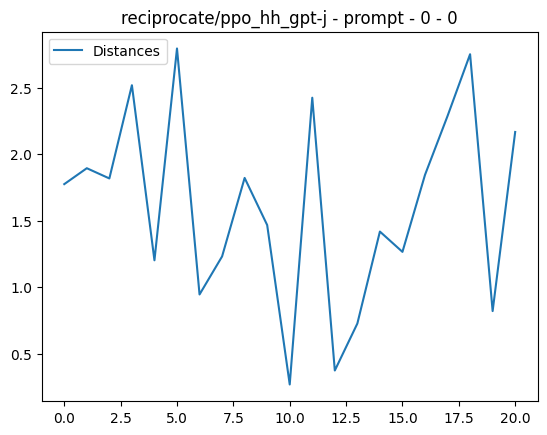

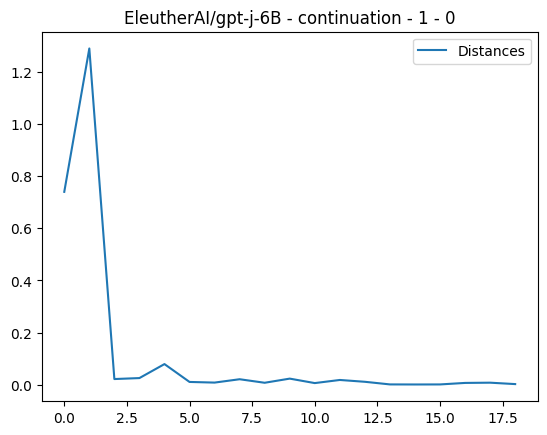

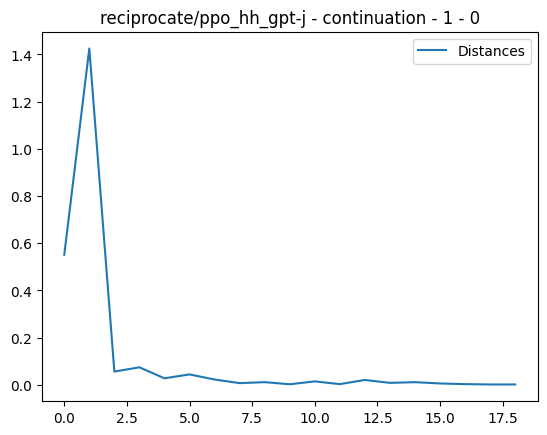

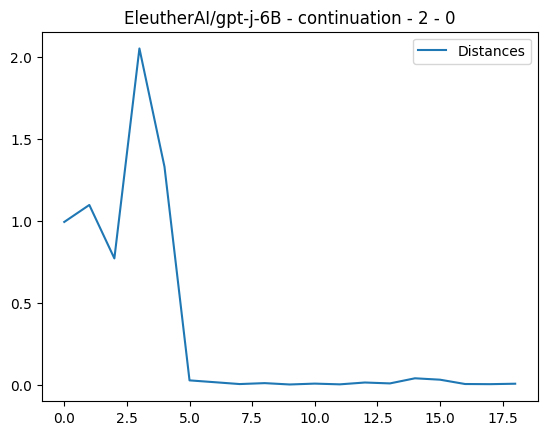

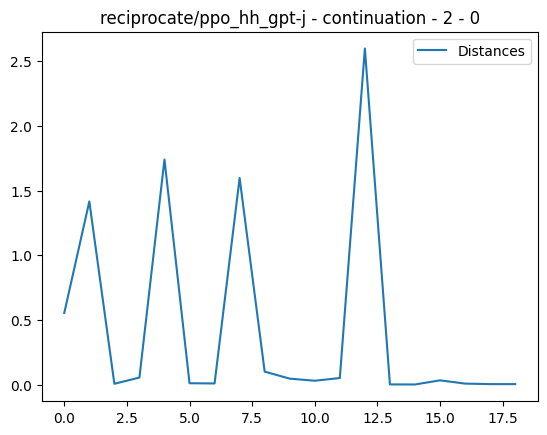

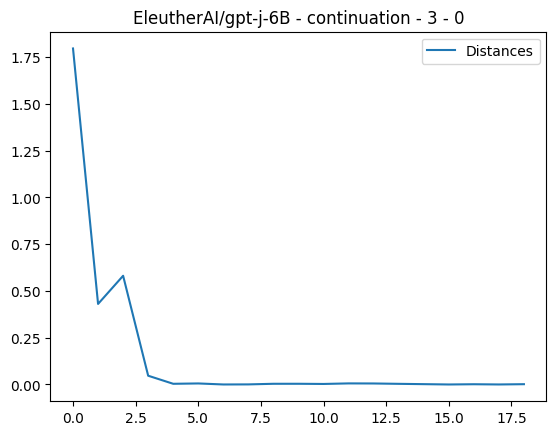

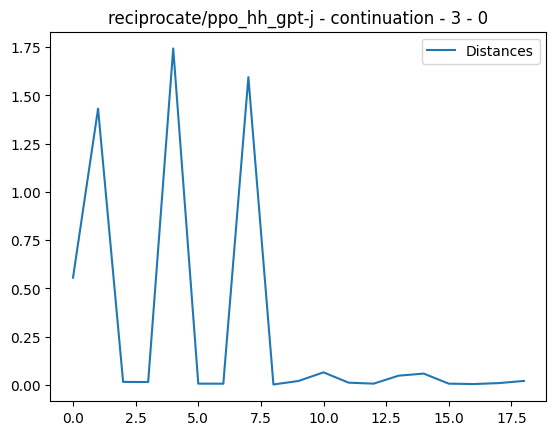

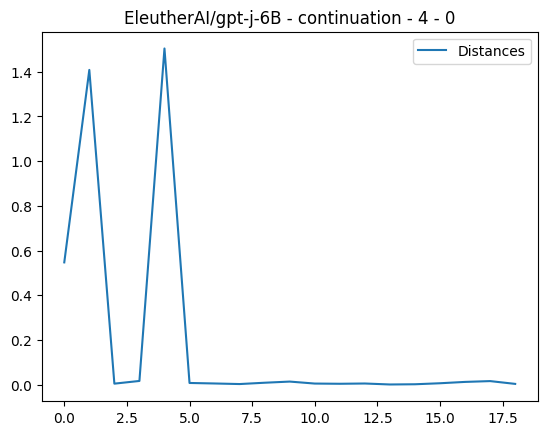

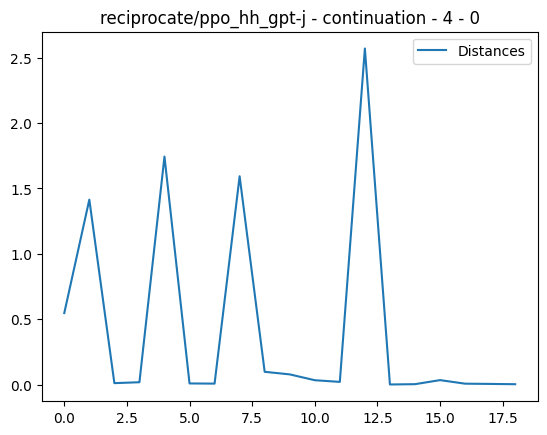

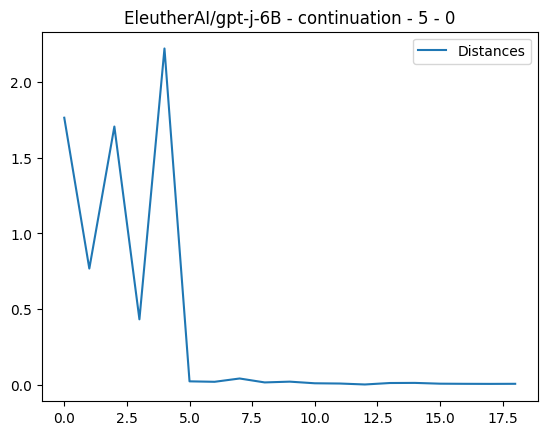

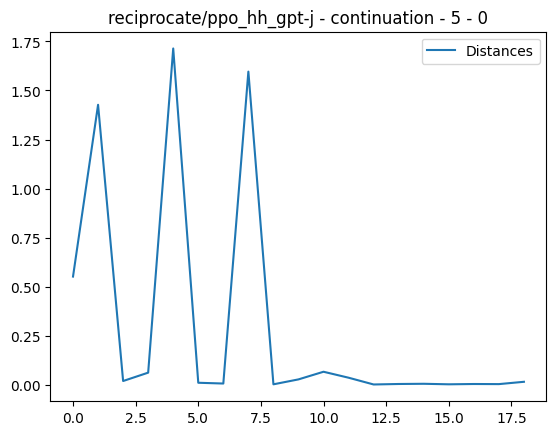

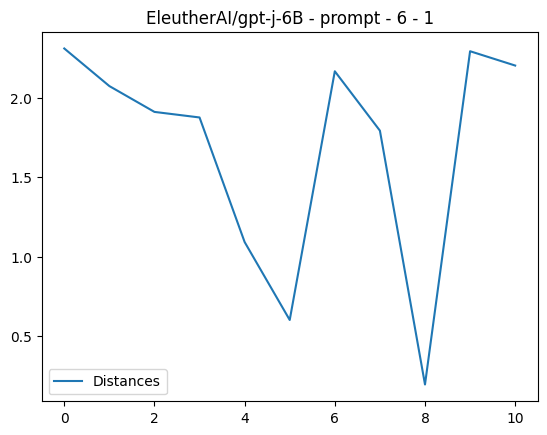

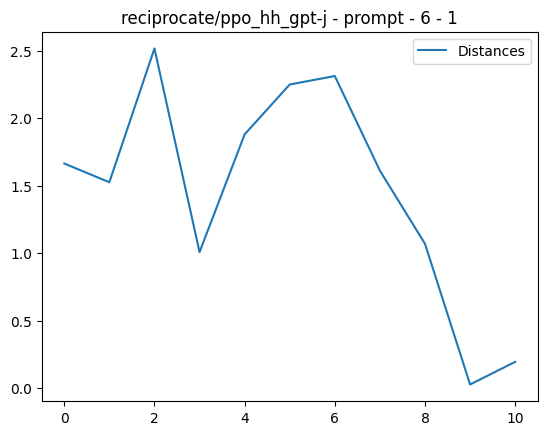

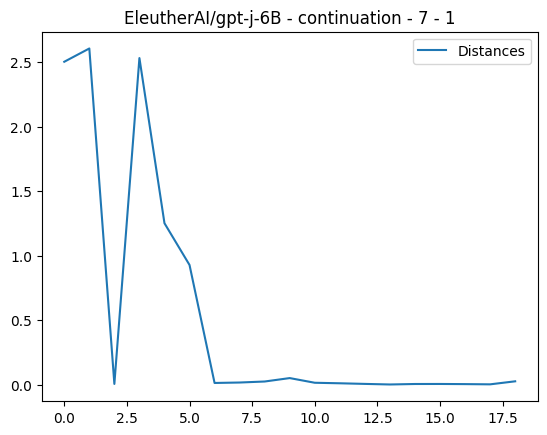

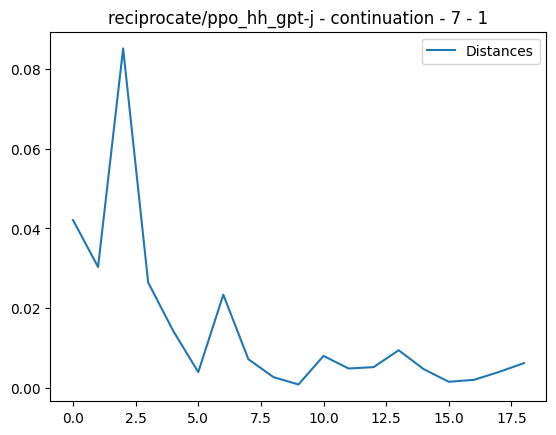

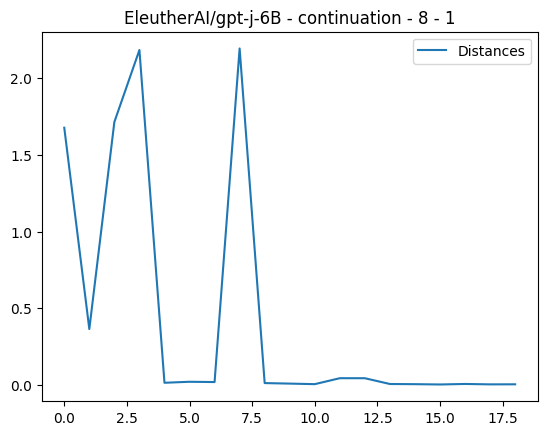

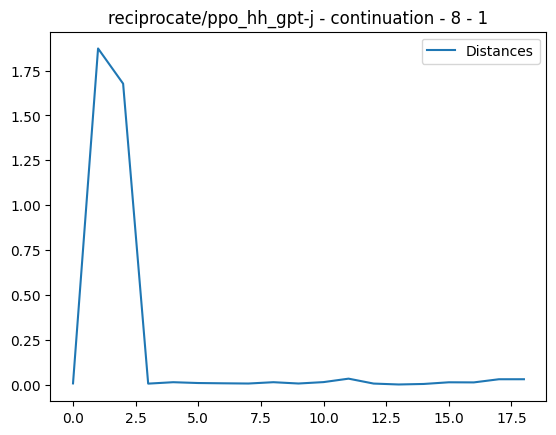

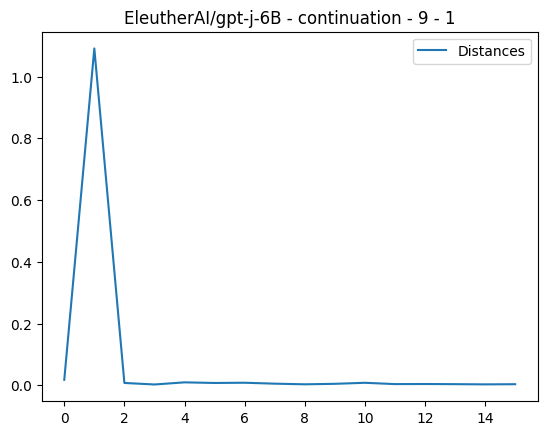

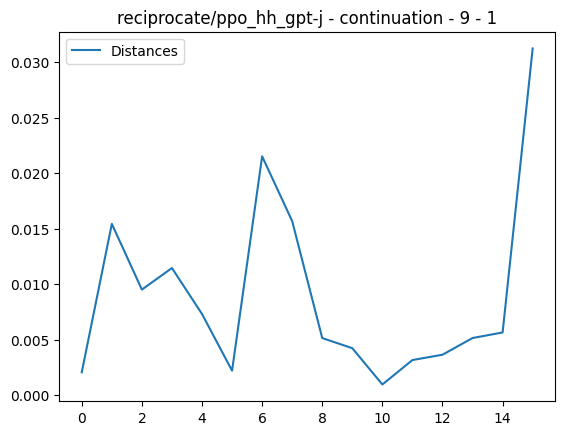

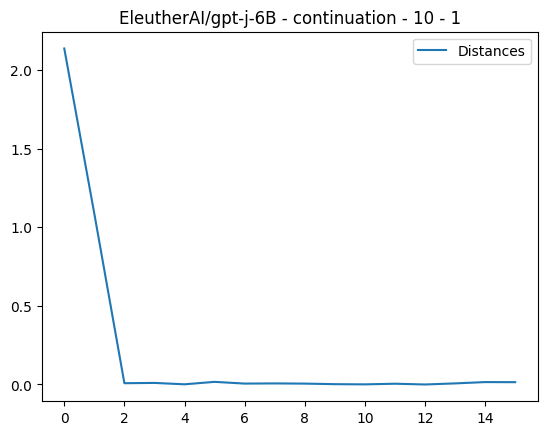

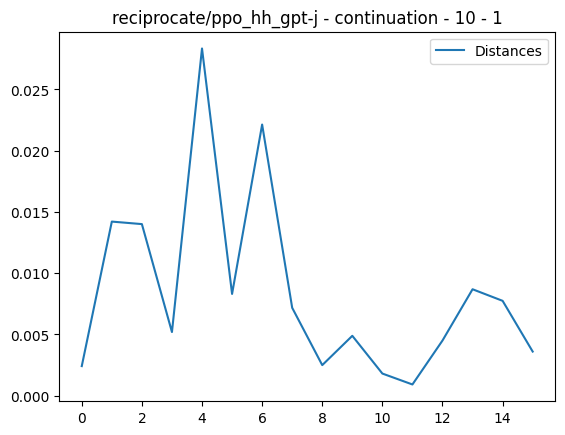

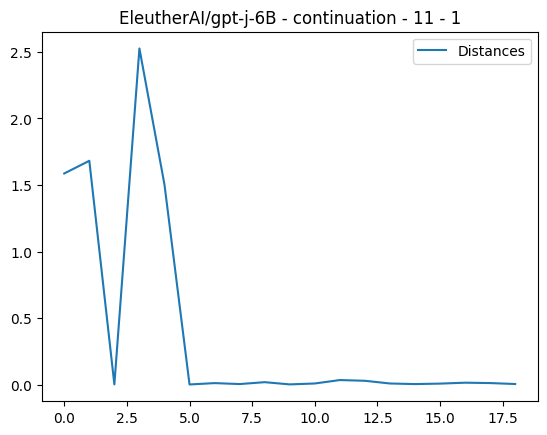

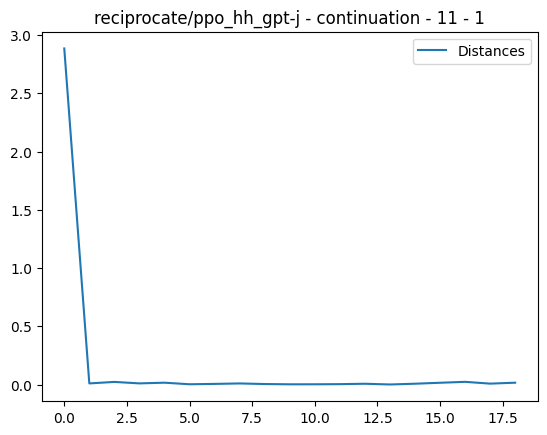

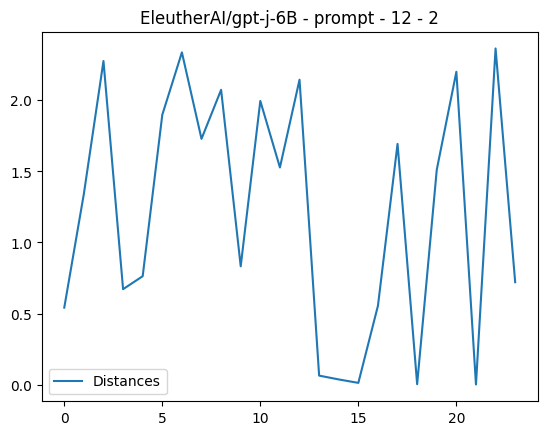

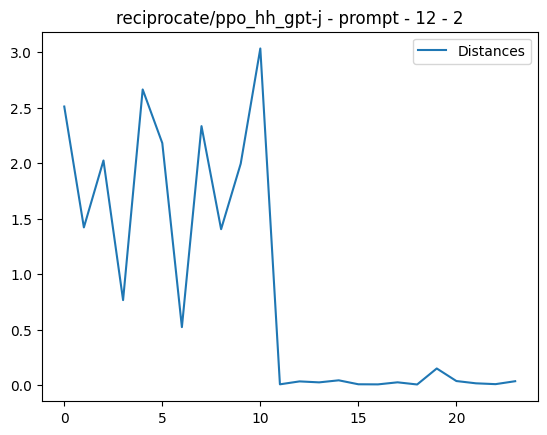

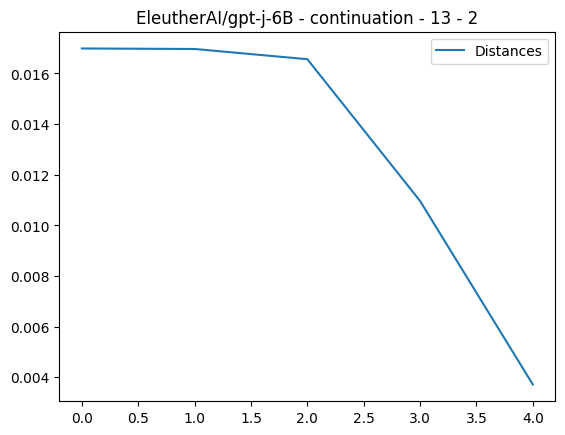

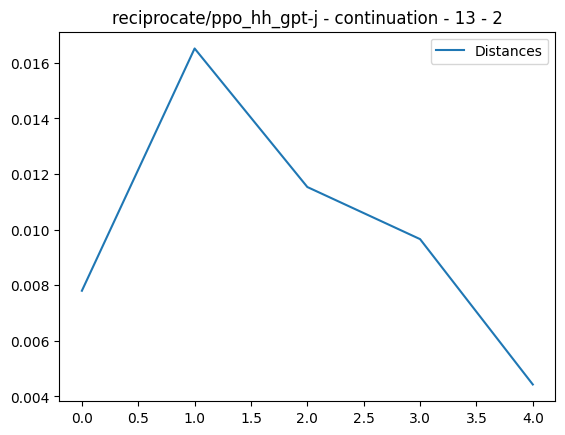

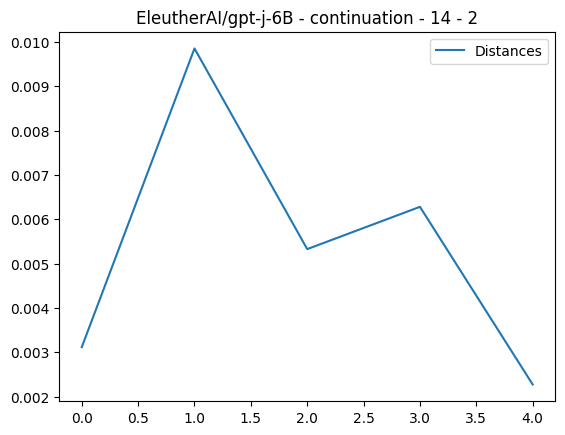

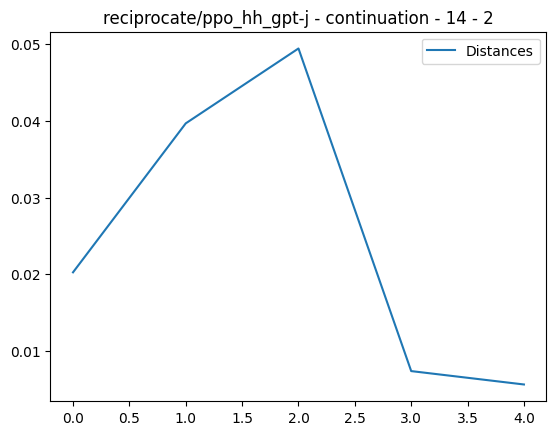

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:10                                                                                   │
│                                                                                                  │
│    7 │   if index == 50:                                                                         │
│    8 │   │   break                                                                               │
│    9 │   coordinates = np.array(json.loads(row["coordinates"]))                                  │
│ ❱ 10 │   geodesic_distances = 2 * np.arcsin(np.linalg.norm(coordinates[:-1] - coordinates[1:]    │
│   11 │                                                                                           │
│   12 │   plt.plot(geodesic_distances, label='Distances')                                         │
│   13 │   plt.title(f"{row['model_strings']} - {row['prompt_or_continuation']} - {index // 2}     │
│ in norm:180                                                                                      │
│                                                                                                  │
│ /usr/local/lib/python3.10/dist-packages/numpy/linalg/linalg.py:2557 in norm                      │
│                                                                                                  │
│   2554 │   │   elif ord is None or ord == 2:                                                     │
│   2555 │   │   │   # special case for speedup                                                    │
│   2556 │   │   │   s = (x.conj() * x).real                                                       │
│ ❱ 2557 │   │   │   return sqrt(add.reduce(s, axis=axis, keepdims=keepdims))                      │
│   2558 │   │   # None of the str-type keywords for ord ('fro', 'nuc')                            │
│   2559 │   │   # are valid for vectors                                                           │
│   2560 │   │   elif isinstance(ord, str):                                                        │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
AxisError: axis 1 is out of bounds for array of dimension 1

In [63]:
# coordinates = np.array(json.loads(df.iloc[0]["coordinates"]))
# print(coordinates.shape)

# print(np.linalg.norm(coordinates[:-1] - coordinates[1:], axis=1))

for index, row in df.iterrows():
    if index == 50:
        break
    coordinates = np.array(json.loads(row["coordinates"]))
    geodesic_distances = 2 * np.arcsin(np.linalg.norm(coordinates[:-1] - coordinates[1:], axis=1) / 2)

    plt.plot(geodesic_distances, label='Distances')
    plt.title(f"{row['model_strings']} - {row['prompt_or_continuation']} - {index // 2} - {index // 12}")
    plt.legend()
    plt.show()

## For the first 5 words, calculate the biggest jumps

In [76]:
word_dist_dict = {}
FIRST_N_WORDS = 5

for index, row in df.iterrows():
    coordinates = np.array(json.loads(row["coordinates"]))
    try:
        geodesic_distances = 2 * np.arcsin(np.linalg.norm(coordinates[:-1] - coordinates[1:], axis=1) / 2)

        words = row["labels"].replace("\"", "").replace("\'", "").replace("[", "").replace("]", "").split(", ")

        for i in range(min(FIRST_N_WORDS, len(words))):
            if not words[i] in word_dist_dict:
                word_dist_dict[words[i]] = [geodesic_distances[i]]
            else:
                word_dist_dict[words[i]].append(geodesic_distances[i])
    except:
        print(index)


word_dist_dict = {key: sum(word_dist_dict[key])/len(word_dist_dict[key]) for key in word_dist_dict}
word_dist_dict = {k: v for k, v in sorted(word_dist_dict.items(), key=lambda item: item[1])}


# word_dist_dict

30
31
32
33
468
469
2142
2143
2144
2145
2186
2187
2188
2189
2366
2367
2368
2369
3144
3145
4716
4717
4974
4975
4976
4977
4978
4979
5010
5011
5012
5013
5040
5041
6420
6421
6578
6579
6580
6581
6840
6841
7140
7141
7524
7525
7788
7789
8208
8209
8262
8263
8264
8265
8294
8295
8296
8297
8508
8509
8578
8579
8906
8907
8908
8909
8998
8999
10128
10129
10598
10599
10600
10601
11306
11307
11308
11309
11532
11533


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


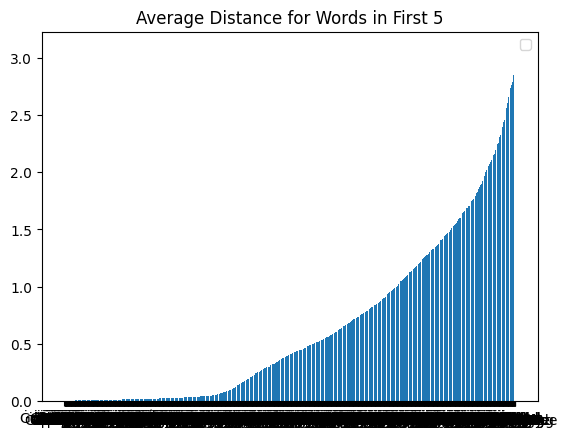

In [77]:
plt.bar(word_dist_dict.keys(), word_dist_dict.values())
plt.title(f"Average Distance for Words in First {FIRST_N_WORDS}")
plt.legend()
plt.show()

# data_canada = px.data.gapminder().query("country == 'Canada'")
# print(data_canada)
fig = px.bar([{"avg_dist": word_dist_dict[key], "word": key} for key in word_dist_dict], x='word', y='avg_dist')
fig.show()